🟢 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

🟢 Missing Values Check:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigr

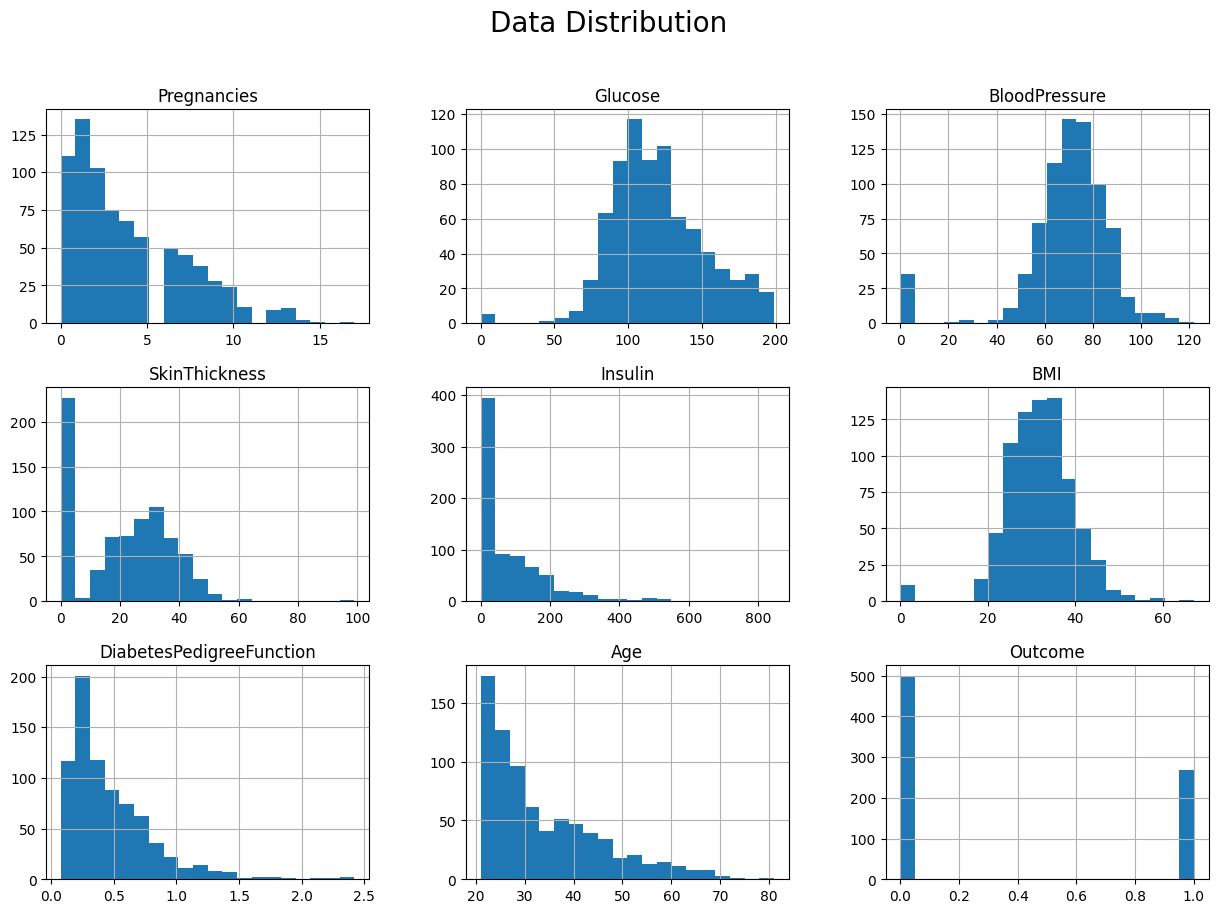

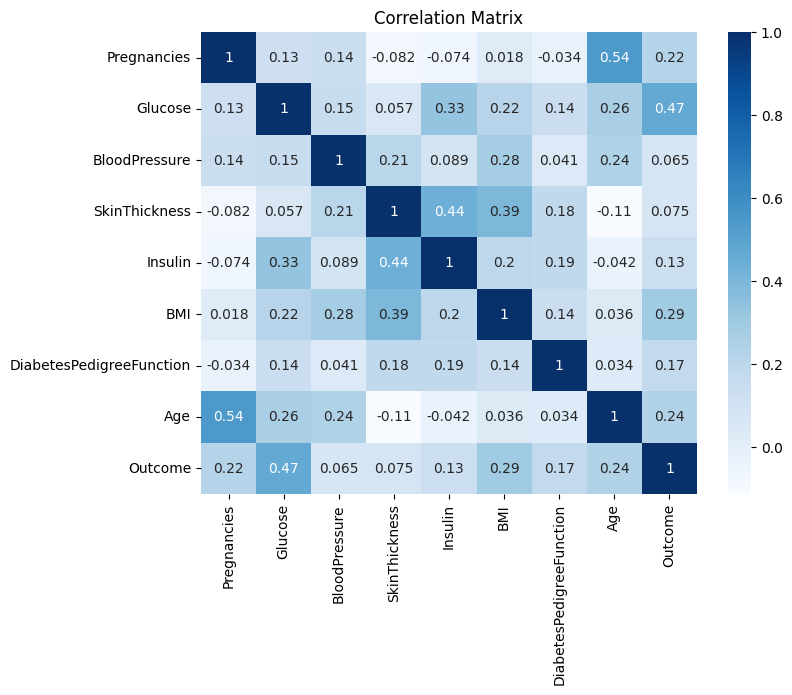

In [44]:
# Required libraries import karo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV File load karo
df = pd.read_csv('diabetes.csv')

# Dataset ka basic overview lo
print("🟢 Dataset Info:")
print(df.info())
print("\n🟢 Missing Values Check:")
print(df.isnull().sum())
print("\n🟢 First 5 rows of dataset:")
print(df.head())

# Statistical summary
print("\n🟢 Summary Statistics:")
print(df.describe())

# Data distribution dekhne ke liye histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Data Distribution', fontsize=20)
plt.show()

# Correlation matrix visualize karo
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


In [46]:
# Missing values check karo (0 values ko NaN me convert karo)
missing_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 0 values ko NaN me convert karo
df[missing_cols] = df[missing_cols].replace(0, np.nan)

# Missing values ko median se fill karo (correct syntax ke saath)
df[missing_cols] = df[missing_cols].apply(lambda col: col.fillna(col.median()))

# Confirm karo ki missing values handle ho gayi hain
print("\n🟢 Missing Values After Handling:")
print(df.isnull().sum())



🟢 Missing Values After Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [47]:
# Outlier detection using IQR method
def detect_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"🟢 Outliers in {col}: {len(outliers)}")

outlier_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
detect_outliers(df, outlier_cols)

# Outliers remove karna (optional)
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\n🟢 Outliers Removed! New Dataset Shape:", df.shape)


🟢 Outliers in Glucose: 0
🟢 Outliers in BloodPressure: 14
🟢 Outliers in SkinThickness: 87
🟢 Outliers in Insulin: 346
🟢 Outliers in BMI: 8

🟢 Outliers Removed! New Dataset Shape: (354, 9)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

print("\n🟢 Normalization Complete!")



🟢 Normalization Complete!



🟢 Feature Importance (Random Forest):
                    Feature  Importance
1                   Glucose    0.266249
5                       BMI    0.192158
7                       Age    0.142935
6  DiabetesPedigreeFunction    0.140913
2             BloodPressure    0.105250
0               Pregnancies    0.099038
3             SkinThickness    0.053456
4                   Insulin    0.000000


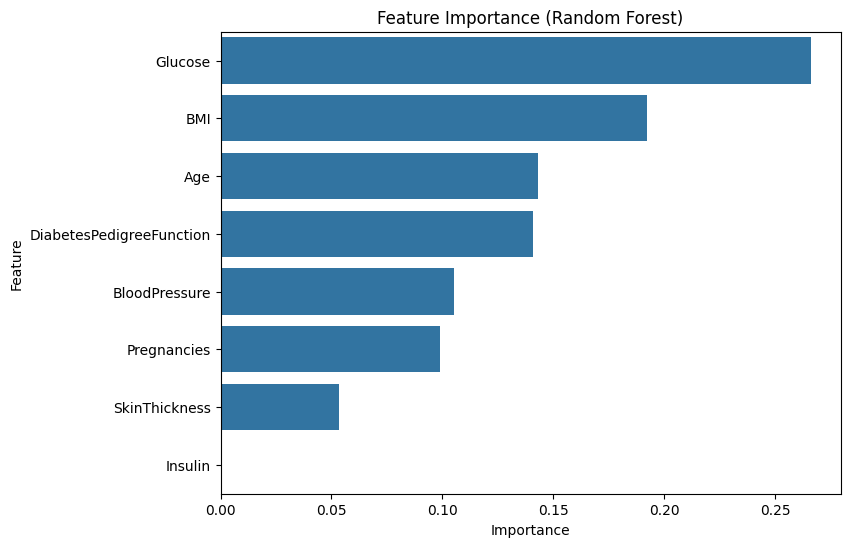

In [49]:
# Required libraries import karo
from sklearn.ensemble import RandomForestClassifier

# Features (X) aur Target (y) define karo
X = df.drop('Outcome', axis=1)  # Sabhi input features
y = df['Outcome']               # Prediction target

# Random Forest se feature importance nikalna
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance display karo
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\n🟢 Feature Importance (Random Forest):")
print(feature_importance)

# Visualization of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [50]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Top 5 most important features select karo
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Selected features ka naam print karo
selected_features = X.columns[selector.get_support()]
print("\n🟢 Selected Features (Top 5):", selected_features.tolist())



🟢 Selected Features (Top 5): ['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [51]:
from sklearn.model_selection import train_test_split

# Features (X) aur Target (y) define karo
X = df.drop('Outcome', axis=1)  # Input features
y = df['Outcome']               # Target

# Data ko 70-30 me split karo (Train: 70%, Test: 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\n🟢 Train Set Size:", X_train.shape)
print("🟢 Test Set Size:", X_test.shape)



🟢 Train Set Size: (247, 8)
🟢 Test Set Size: (107, 8)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction karo
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("\n🟢 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n🟢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n🟢 Classification Report:\n", classification_report(y_test, y_pred_rf))



🟢 Random Forest Accuracy: 0.7663551401869159

🟢 Confusion Matrix:
 [[54 15]
 [10 28]]

🟢 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        69
           1       0.65      0.74      0.69        38

    accuracy                           0.77       107
   macro avg       0.75      0.76      0.75       107
weighted avg       0.78      0.77      0.77       107



In [53]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

# Prediction karo
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
print("\n🟢 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n🟢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\n🟢 Classification Report:\n", classification_report(y_test, y_pred_lr))



🟢 Logistic Regression Accuracy: 0.7383177570093458

🟢 Confusion Matrix:
 [[56 13]
 [15 23]]

🟢 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        69
           1       0.64      0.61      0.62        38

    accuracy                           0.74       107
   macro avg       0.71      0.71      0.71       107
weighted avg       0.74      0.74      0.74       107



In [54]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
print("\n🟢 Best Parameters (Random Forest):", grid_search.best_params_)

# Best Model
best_rf_model = grid_search.best_estimator_

# Prediction with Best Model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the Tuned Model
print("\n🟢 Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\n🟢 Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 36 candidates, totalling 180 fits

🟢 Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

🟢 Tuned Random Forest Accuracy: 0.7570093457943925

🟢 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        69
           1       0.64      0.71      0.68        38

    accuracy                           0.76       107
   macro avg       0.74      0.75      0.74       107
weighted avg       0.76      0.76      0.76       107



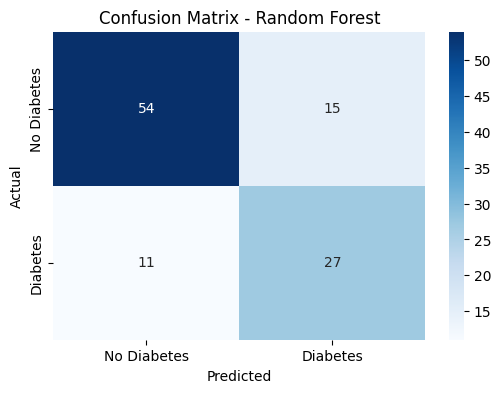

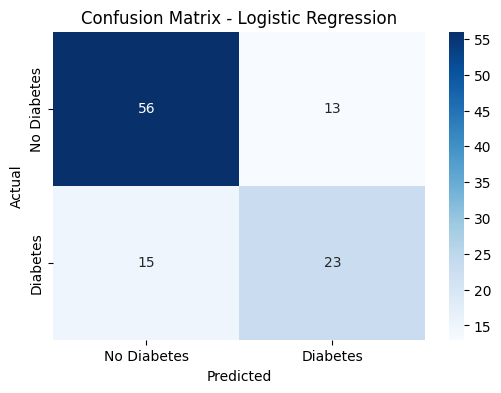

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix Function
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Random Forest Confusion Matrix
plot_confusion_matrix(y_test, y_pred_best_rf, "Random Forest")

# Logistic Regression Confusion Matrix
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")


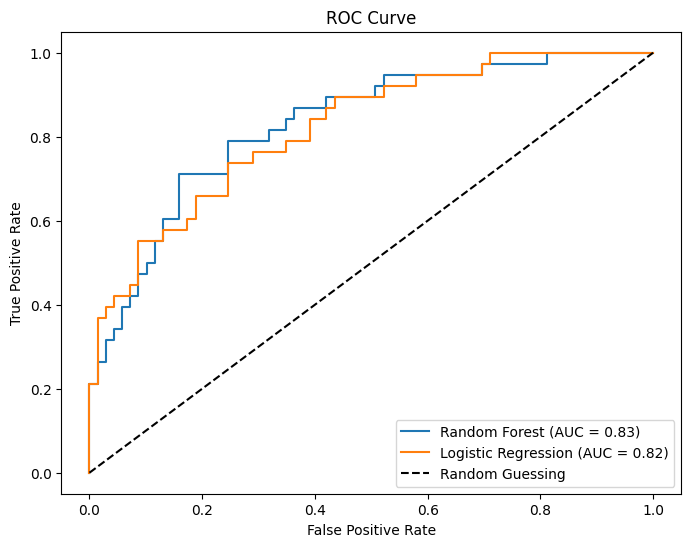

In [56]:
from sklearn.metrics import roc_curve, auc

# Probabilities Nikalna
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

auc_rf = auc(fpr_rf, tpr_rf)
auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


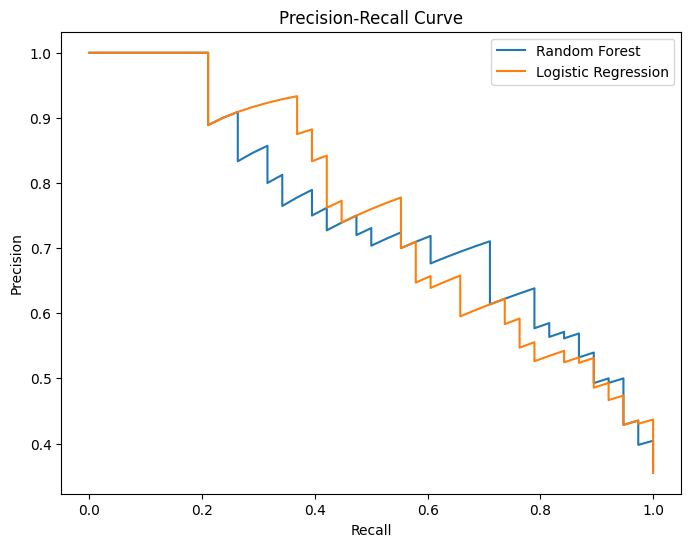

In [57]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [58]:
import pickle

# Best Random Forest Model ko save karo
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

print("\n🟢 Model Saved Successfully: diabetes_model.pkl")



🟢 Model Saved Successfully: diabetes_model.pkl
